<a href="https://colab.research.google.com/github/Khalidzo/digit-recognition/blob/main/Make_your_own_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
class neuralNetwork:
  def __init__(self, input, hidden, output, learning_rate):
      # NN dimensions
      self.input = input
      self.hidden = hidden
      self.output = output

      # define learning_rate
      self.lr = learning_rate

      # trivial weights random initialization
      #self.wih = np.random.rand(self.hidden, self.input) - 0.5
      #self.who = np.random.rand(self.output, self.hidden) - 0.5

      # normal dist initalization
      self.wih = np.random.normal(0.0, pow(self.input, -0.5), (self.hidden, self.input))
      self.who = np.random.normal(0.0, pow(self.hidden, -0.5), (self.output, self.hidden))


      # output function
      self.activation_function = lambda x: scipy.special.expit(x)

  def train(self, inputs_list, targets_list):
      inputs = np.array(inputs_list, ndmin=2).T
      targets = np.array(targets_list, ndmin=2).T

      # feed input to the hidden layer
      hidden_inputs = np.dot(self.wih, inputs)
      hidden_outputs = self.activation_function(hidden_inputs)

      # feed input to the output(final) layer
      final_inputs = np.dot(self.who, hidden_outputs)
      final_outputs = self.activation_function(final_inputs)

      # calculate error
      output_errors = targets - final_outputs
      hidden_errors = np.dot(self.who.T, output_errors)

      # update the weights
      self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
      self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))

  def query(self, inputs_list):
      # convert input to 2D array
      inputs = np.array(inputs_list, ndmin=2).T

      # feed input to the hidden layer
      hidden_inputs = np.dot(self.wih, inputs)
      hidden_outputs = self.activation_function(hidden_inputs)

      # feed input to the output(final) layer
      final_inputs = np.dot(self.who, hidden_outputs)
      final_outputs = self.activation_function(final_inputs)

      return final_outputs

In [4]:
data_file = open('/content/mnist_dataset/mnist_test_10.csv', 'r')
data_list = data_file.readlines()
data_file.close()

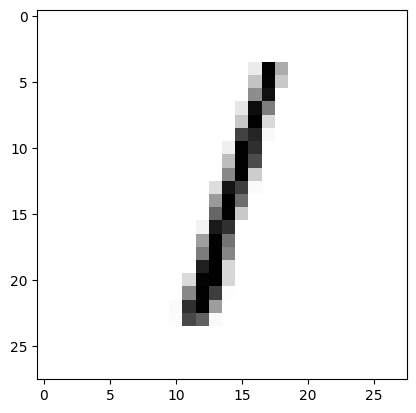

In [5]:
all_values = data_list[2].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [6]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

In [7]:
# layers
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# set learning rate
learning_rate = 0.3

# instantiate the NN
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [8]:
# upload training data
training_data_file = open('/content/mnist_dataset/mnist_train_100.csv')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [9]:
# train the network
epochs = 10

for e in range(epochs):
  for record in training_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    # initalize the output vector and offset 0.01
    targets = np.zeros(output_nodes) + 0.01

    # target output
    targets[int(all_values[0])] = 0.99

    # feed the neural network
    n.train(inputs, targets)

In [10]:
# load testing data
test_data_file = open('/content/mnist_dataset/mnist_test_10.csv')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [11]:
# test the network with just one example
all_values = test_data_list[0].split(',')
print(all_values[0])

7


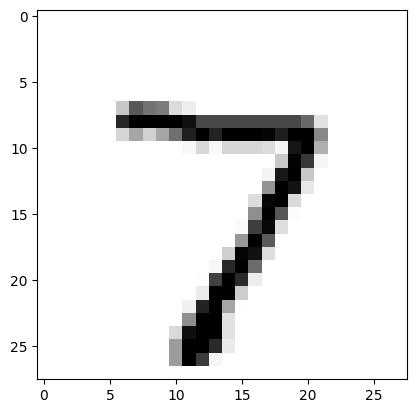

In [12]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [13]:
np.argmax(n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.1))

7

In [14]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)


In [15]:
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.6
